## Part 3 Clustering

Download the Mall Customer Segmentation Data from our github repo and determine the optimum "k" value using the elbow method.

Visualize the determined categories with 3D plot (Age vs. Incompe vs. Spending Score).

Play with view angles to see the two groups of the high income people (making more than $80k)

### K-Means Clustering

K-Means clustering is a prototype-based clustering that uses a centroid or a center around which the data points are spread.
- We have to decide the number of clusters, k, n=into which the data has to be trained into.
- All the data points, even outliers are assigned a cluster.

In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/ekacar1/Data_for_Lectures/main/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
X_mail = df[['Age','Annual Income (k$)','Spending Score (1-100)']]

In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X_mail)

In [4]:
cluster_sums = []  # Initialize the list to store cluster sums
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_std)  # Fit the model to the standardized data
    cluster_sums.append(kmeans.inertia_)
    print("k =", k, "Inertia =", kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

k = 1 Inertia = 600.0
k = 2 Inertia = 389.3861889564371
k = 3 Inertia = 295.2122461555488
k = 4 Inertia = 205.22514747675922
k = 5 Inertia = 168.24758017556837
k = 6 Inertia = 133.86842085478852
k = 7 Inertia = 120.43283250037275


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k = 8 Inertia = 103.81525583671635
k = 9 Inertia = 92.3494576711305
k = 10 Inertia = 82.88526644450903


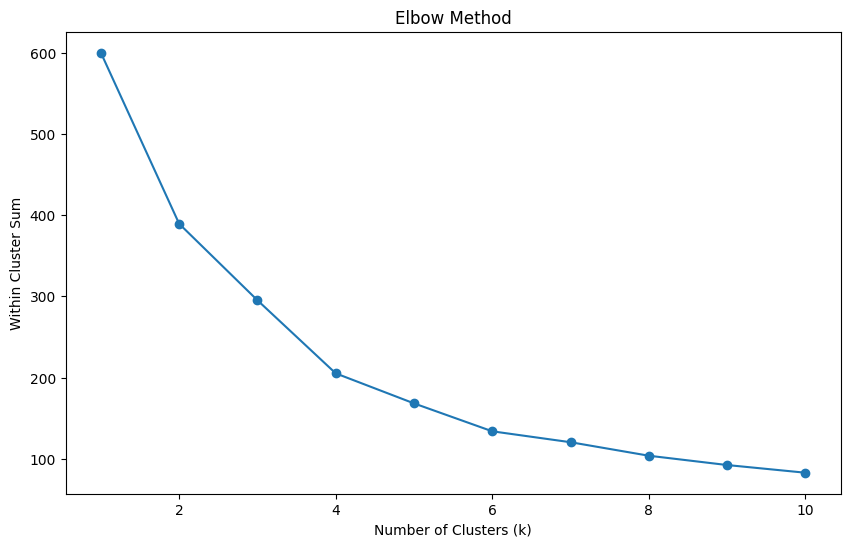

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,6))
plt.plot(range(1,11),cluster_sums, marker = 'o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within Cluster Sum')
plt.show()

> We observe that the elbow forms at either 6 or 7 clusters. We can use k = 7

In [6]:
from mpl_toolkits.mplot3d import Axes3D

In [7]:
k = 7
kmeans = KMeans(n_clusters = k, random_state = 42)
kmeans.fit(X_std)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=7, random_state=42)

In [8]:
clusters = kmeans.labels_

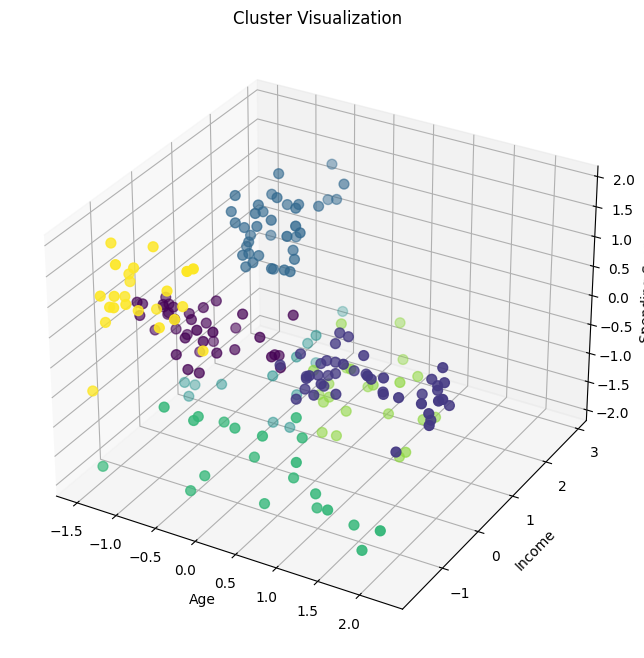

In [9]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_std[:, 0], X_std[:, 1], X_std[:, 2], c = clusters, cmap='viridis', s=50)
ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Spending Score')
ax.set_title('Cluster Visualization')
plt.show()

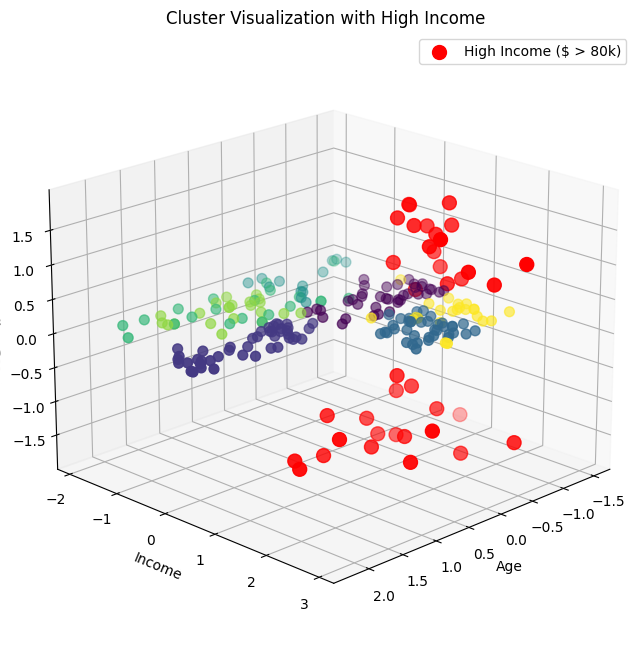

In [10]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111, projection = '3d')
scatter = ax.scatter(X_std[:,0], X_std[:,2], c = clusters, cmap = 'viridis', s = 50)
high_income = X_mail['Annual Income (k$)'] > 80
ax.scatter(X_std[high_income,0], X_std[high_income,1], X_std[high_income, 2], c= 'red',marker='o', s=100, label='High Income ($ > 80k)')
ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Spending Score')
ax.set_title('Cluster Visualization with High Income')
ax.legend()
ax.view_init(elev=20, azim=45)
plt.show()

We can observe the high income (>$80k) cluster from the above plot.
- For the population of high income, the age tends to be lower than the average age of the population.
- For the high income population, the spending score is higher than the average spending score of the total population.
> There is a tendency for higher spending among the younger population with a high annual income.